1. Importing the dependencies

In [12]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

2. Importing the datasets and analyzing

In [13]:
#Read the csv file into a panda dataframe
df = pd.read_csv("train.csv")

In [14]:
df.shape

(800, 22)

In [15]:
df.size

17600

In [16]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [17]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [18]:
#display all the columns
pd.set_option('display.max_columns', None)

In [19]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [20]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [22]:
#convert age column from float to integer
df['age'] = df['age'].astype(int)

In [23]:
df.describe

<bound method NDFrame.describe of       ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0      1         1         0         1         0         1         0   
1      2         0         0         0         0         0         0   
2      3         1         1         1         1         1         1   
3      4         0         0         0         0         0         0   
4      5         0         0         0         0         0         0   
..   ...       ...       ...       ...       ...       ...       ...   
795  796         0         1         0         0         0         0   
796  797         0         1         1         0         0         1   
797  798         0         0         0         0         0         0   
798  799         0         0         0         0         0         0   
799  800         0         1         0         0         0         0   

     A7_Score  A8_Score  A9_Score  A10_Score  age gender       ethnicity  \
0           1         0         1          1   38      f               ?   
1           0         0         0          0   47      m               ?   
2           1         1         1          1    7      m  White-European   
3           0         0         0          0   23      f               ?   
4           0         0         0          0   43      m               ?   
..        ...       ...       ...        ...  ...    ...             ...   
795         0         0         1          1   16      m        Hispanic   
796         0         1         1          1   20      m  White-European   
797         0         0         0          0    5      m     South Asian   
798         0         0         0          0   16      f               ?   
799         0         0         0          0   46      f               ?   

    jaundice austim         contry_of_res used_app_before     result  \
0         no     no               Austria              no   6.351166   
1         no     no                 India              no   2.255185   
2         no    yes         United States              no  14.851484   
3         no     no         United States              no   2.276617   
4         no     no          South Africa              no  -4.777286   
..       ...    ...                   ...             ...        ...   
795       no     no           New Zealand              no  12.999501   
796       no     no                Cyprus              no  13.561518   
797      yes     no           New Zealand              no   2.653177   
798       no     no                Canada              no   9.069342   
799       no     no  United Arab Emirates             yes   2.243304   

        age_desc relation  Class/ASD  
0    18 and more     Self          0  
1    18 and more     Self          0  
2    18 and more     Self          1  
3    18 and more     Self          0  
4    18 and more     Self          0  
..           ...      ...        ...  
795  18 and more     Self          0  
796  18 and more     Self          0  
797  18 and more     Self          0  
798  18 and more     Self          0  
799  18 and more     Self          0  

[800 rows x 22 columns]>

In [24]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [25]:
for col in df.columns:
  numerical_features = ['ID','age','result']
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50+"\n")

A1_Score [1 0]
--------------------------------------------------

A2_Score [0 1]
--------------------------------------------------

A3_Score [1 0]
--------------------------------------------------

A4_Score [0 1]
--------------------------------------------------

A5_Score [1 0]
--------------------------------------------------

A6_Score [0 1]
--------------------------------------------------

A7_Score [1 0]
--------------------------------------------------

A8_Score [0 1]
--------------------------------------------------

A9_Score [1 0]
--------------------------------------------------

A10_Score [1 0]
--------------------------------------------------

gender ['f' 'm']
--------------------------------------------------

ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------

jaundice ['no' 'yes']
---------------------------------------------

In [26]:
#Drop ID and age_desc columns
df.drop(['ID','age_desc'],axis=1,inplace=True)

In [27]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [28]:
df.shape

(800, 20)

In [29]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [30]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [31]:
#Define the mapping duictionaryfor country names
mapping = {
    "Viet Nam":"Vietnam",
    "AmericanSamoa":"Unites States",
    "Honk Kong":"China"
}

#replace value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [32]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Unites States', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [33]:
#Target class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**"Insights"**
1. Missing values in ethnicity and relation
2. age_desc has only one unique value, so we removed it as it is not important for prediction
3. Fixed country names
4. There is a class imbalance in the target column- has_autism=161 & no_autism = 639, we will deal with this using smote

**Exploratory Data Analysis(EDA)**

In [34]:
df.shape

(800, 20)

In [35]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [36]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [37]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

1. Numerical Columns:
*   age
*   result

In [38]:
#set the desired theme
sns.set_theme(style="darkgrid")

Distribution Plots

27.96375
24.0


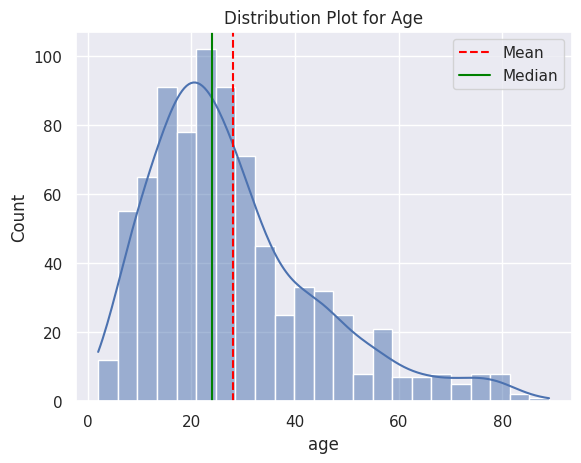

In [39]:
#Histogram for "age"
sns.histplot(df["age"],kde=True)
plt.title("Distribution Plot for Age")

#Calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print(age_mean)
print(age_median)

#add vertical lines for mean and median
plt.axvline(age_mean,color="red",linestyle="--", label="Mean")
plt.axvline(age_median,color="green",linestyle="-",label="Median")
plt.legend()
plt.show()

8.537303106501248
9.605299308


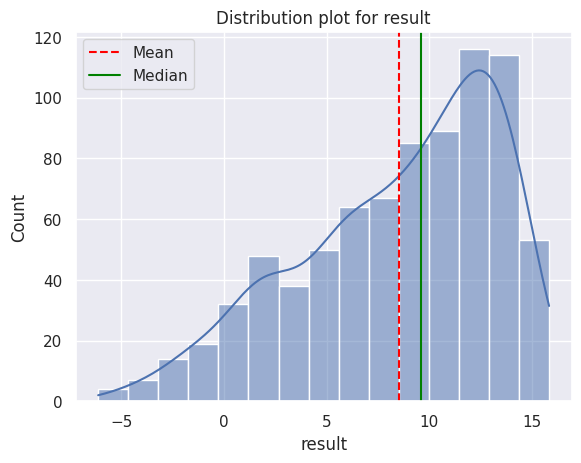

In [40]:
#Histogram for result
sns.histplot(df['result'], kde=True)
plt.title("Distribution plot for result")

#Calculate mean and median
result_mean = df['result'].mean()
result_median = df['result'].median()

print(result_mean)
print(result_median)

#Add vertical lines for mean and median
plt.axvline(result_mean,color="red",linestyle="--",label="Mean")
plt.axvline(result_median,color = "green",linestyle="-",label="Median")

plt.legend()
plt.show()

**Box Plot for identifyinf outliers in the numerical columns**

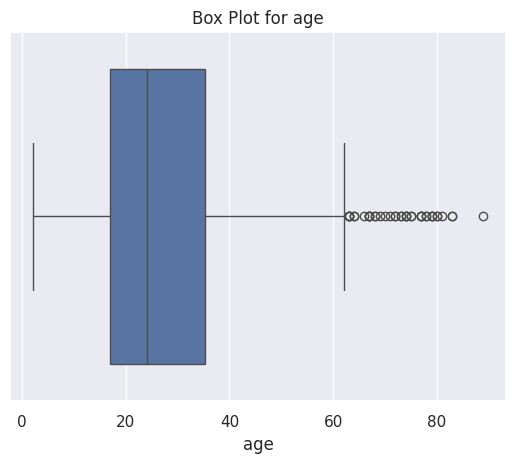

In [41]:
#Box plt
sns.boxplot(x=df["age"])
plt.title("Box Plot for age")
plt.show()

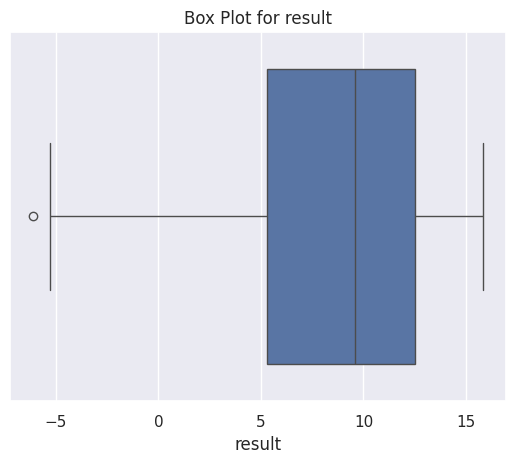

In [42]:
sns.boxplot(x = df["result"])
plt.title("Box Plot for result")
plt.show()

In [97]:
#Count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-IQR*1.5
upper_bound = Q3+IQR*1.5
age_outliers = df[(df["age"]<lower_bound) | (df["age"]>upper_bound)]
print(lower_bound)
print(upper_bound)
#age_outliers.shape

-5.5
54.5


In [44]:
len(age_outliers)

39

In [98]:
#Count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-IQR*1.5
upper_bound = Q3+IQR*1.5
result_outliers = df[(df["result"]<lower_bound) | (df["result"]>upper_bound)]
#age_outliers.shape
print(lower_bound)
print(upper_bound)

-5.4920457
23.318402216000003


In [46]:
len(result_outliers)

1

Univariate analysis of Categorical columns

In [47]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

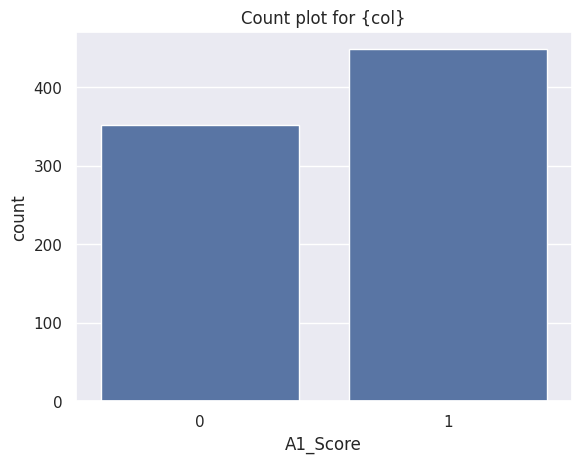

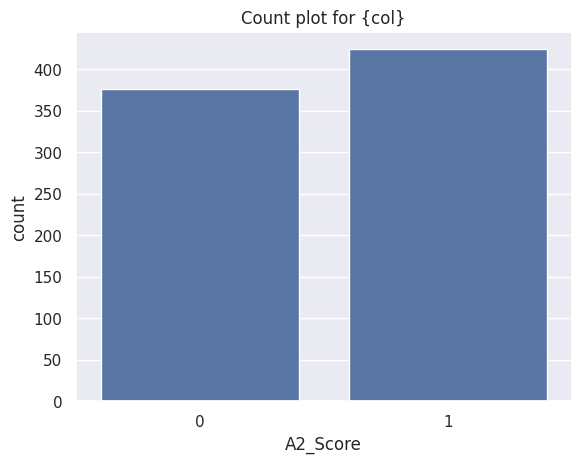

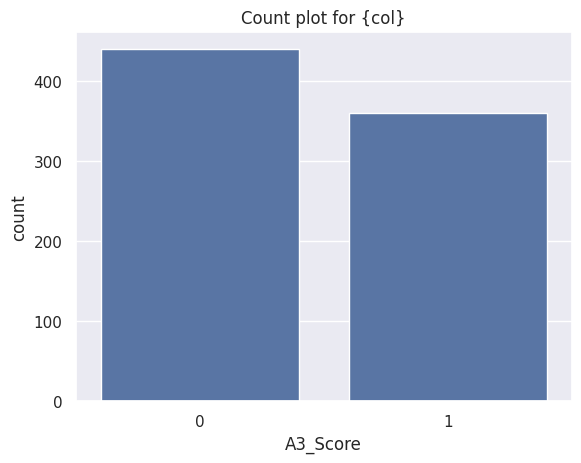

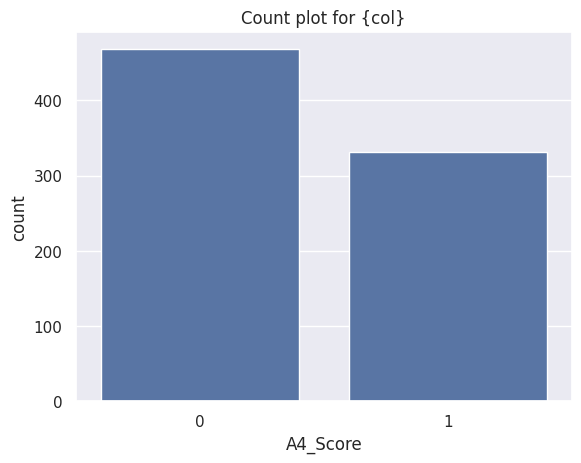

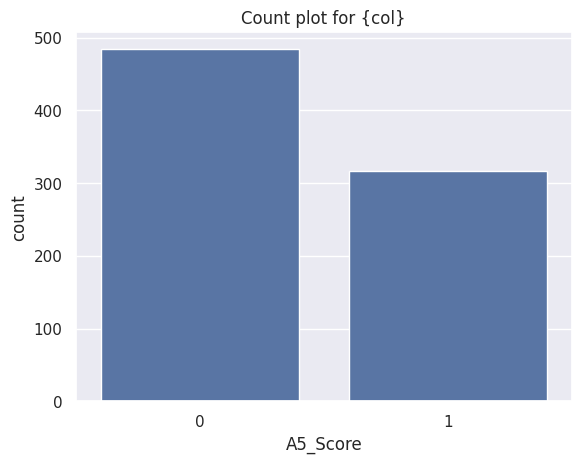

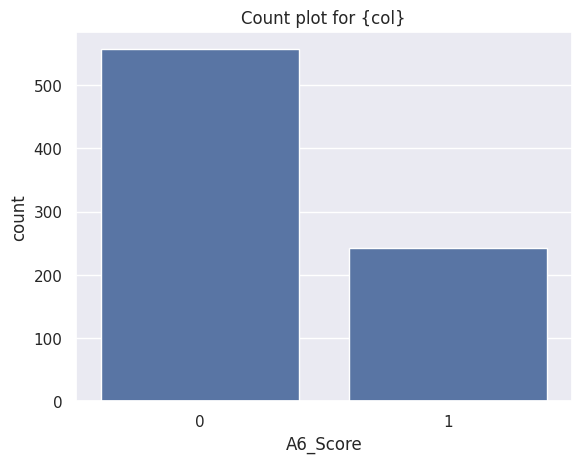

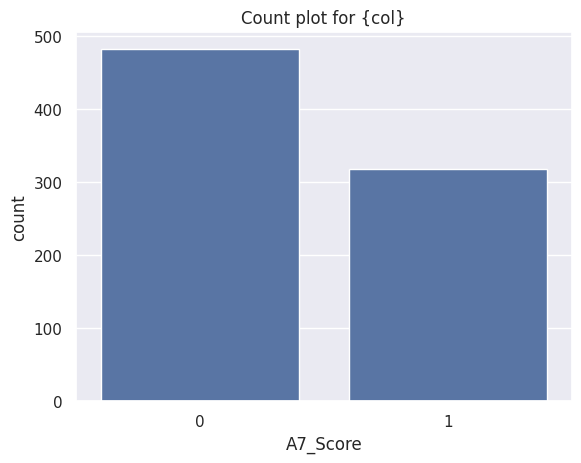

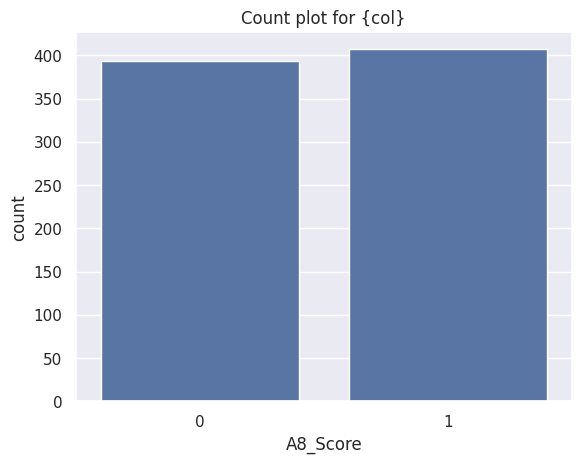

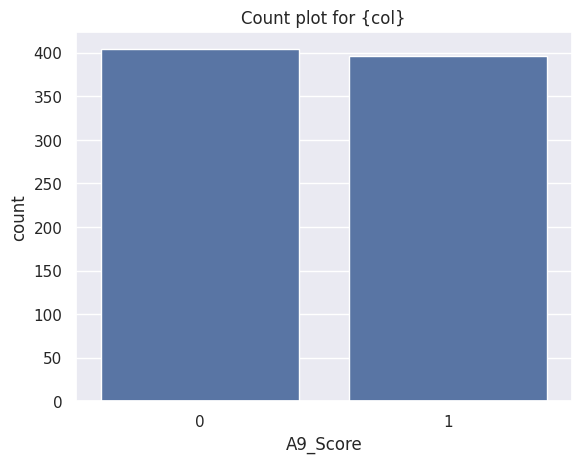

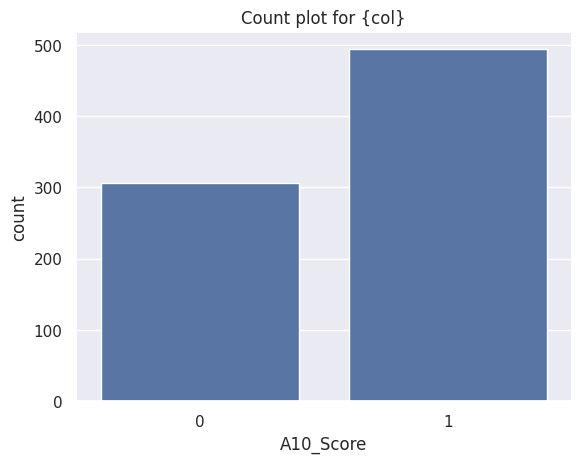

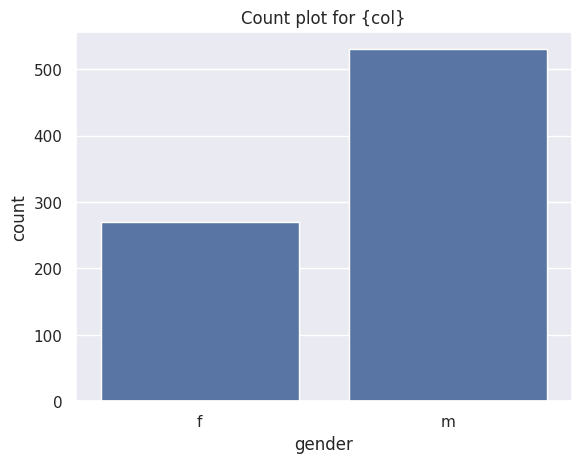

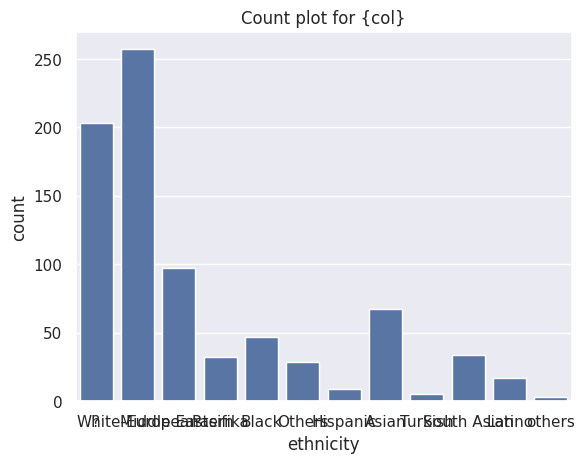

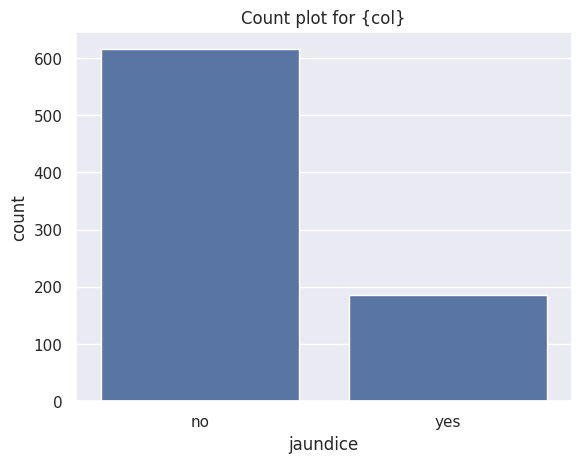

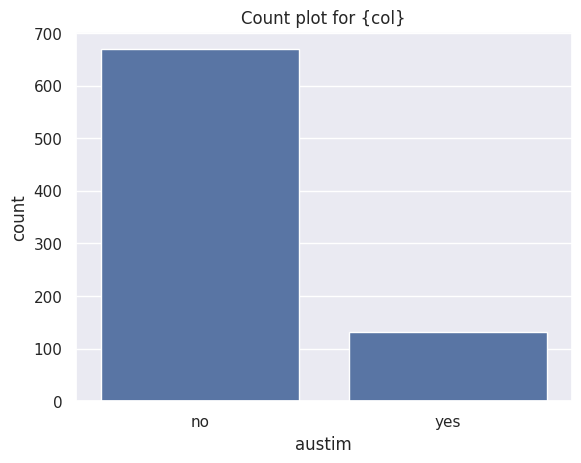

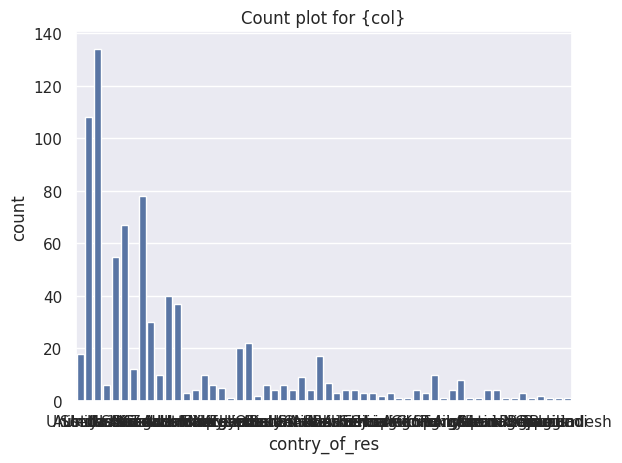

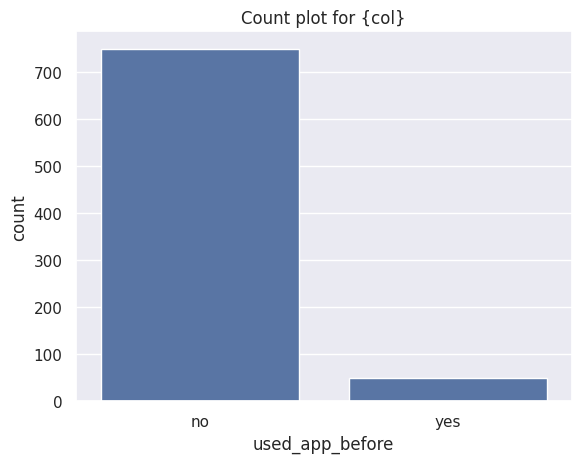

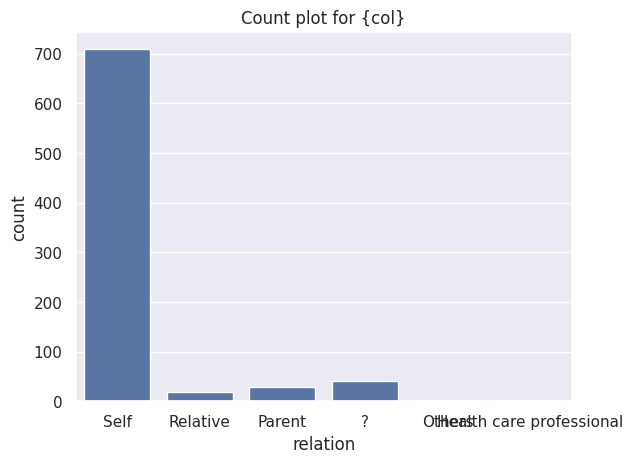

In [48]:
categorical_cols  =['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_cols:
  sns.countplot(x=df[col])
  plt.title("Count plot for {col}")
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

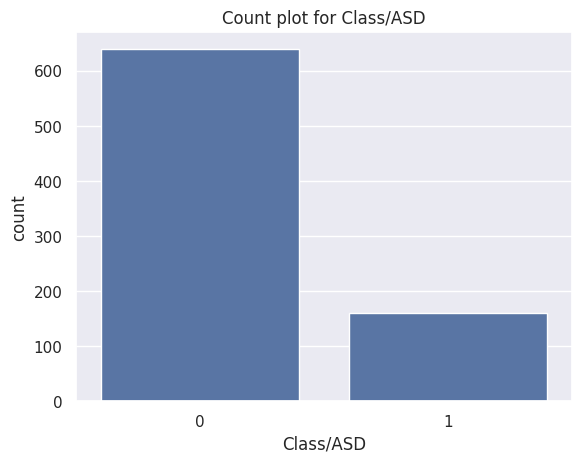

In [49]:
#Countplot for target column Class/ASD
sns.countplot(x=df["Class/ASD"])
plt.title("Count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("count")
plt.show()

In [50]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


handle missing values in ethnicity and relation column

In [51]:
df["ethnicity"].unique()

array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
       'others'], dtype=object)

In [52]:
df["ethnicity"] = df["ethnicity"].replace({"?":"Others","others":"Others"})

In [53]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [54]:
df["relation"] = df["relation"].replace(
    {"?":"Others",
     "Relative":"Others",
     "Parent":"Others",
     "Health care professional":"Others"}
)

In [55]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [56]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


**Label Encoding**

label encoding is done on entire dataset, not just on train or test data

In [57]:
#Identify columns with object datatype
object_columns  =df.select_dtypes(include=["object"]).columns

In [58]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [96]:
df['result'].min()

-5.264833431

In [59]:
#Initialize a dictionary to store the encoders
encoders = {}

#Apply label encoding and store the encoders
for col in object_columns:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  encoders[col]=label_encoder

#save the encoders as a pickle file
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

In [60]:
with open("encoders.json","wb") as f:
  pickle.dump(encoders,f)

In [61]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [62]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,45,0,-4.777286,1,0


**Bivariate Analysis**

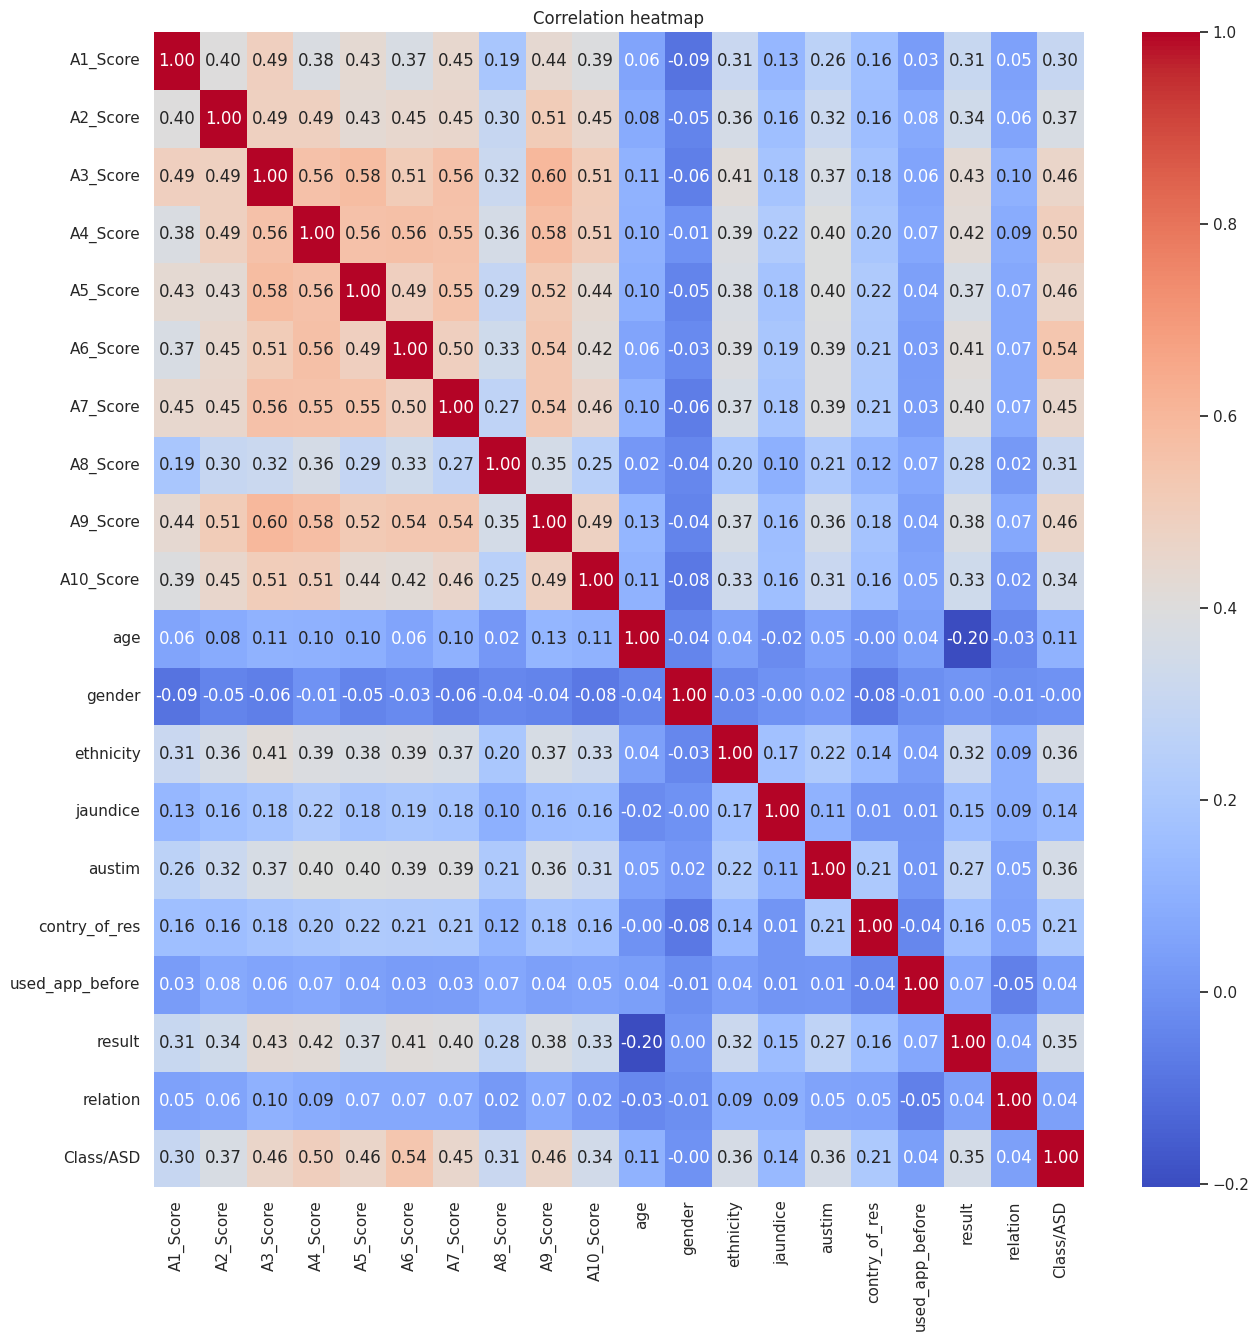

In [63]:
#Correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

**INSIGHTS FROM EDA**
1. There are few outliers in numerical features
2. There is a class imbalance in target column
3. There is a class imbalance in the categorical feature as well
4. We don't have any highly correlated column.
5. Performed label encoding and saved the encoders in encoders.pkl

**DATA PREPROCESSING**

Handling the outliers

In [64]:
#Function to replace outliers with median values
def replace_outliers_with_median(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1

  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  median = df[column].median()

  #replace ouliers with median
  #df.loc[df[column]<lower_bound | df[column]>upper_bound]=median
  df[column] = df[column].apply(lambda x: median if x<lower_bound or x>upper_bound else x)

  return df

In [65]:
#Replace outliers in the age column
df = replace_outliers_with_median(df,"age")

#Replace outliers in the age column
df = replace_outliers_with_median(df,"result")

In [66]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,45,0,-4.777286,1,0


In [67]:
df.shape

(800, 20)

**Train Test Split**

In [68]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [69]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [70]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [71]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [74]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [75]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


**SMOTE(Synthetic Minority Oversampling Technique)**

In [76]:
smote = SMOTE(random_state=42)

In [77]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [78]:
print(y_train_smote.shape)

(1030,)


In [79]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


**Model Training**

In [80]:
#List of classifiers
models = {
    "Decision Tree" : DecisionTreeClassifier(random_state = 42),
    "Random Forest" : RandomForestClassifier(random_state = 42),
    "xgboost" : XGBClassifier(random_state=42)
}

In [81]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}


In [82]:
#Dictionary to store the cross_validation results
cv_scores = {}

#Perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross_Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)


Training Decision Tree with default parameters...
Decision Tree Cross_Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross_Validation Accuracy: 0.92
--------------------------------------------------
Training xgboost with default parameters...
xgboost Cross_Validation Accuracy: 0.90
--------------------------------------------------


In [83]:
cv_scores

{'Decision Tree': array([0.79126214, 0.88349515, 0.88349515, 0.8592233 , 0.8592233 ]),
 'Random Forest': array([0.91262136, 0.93203883, 0.9223301 , 0.91262136, 0.91747573]),
 'xgboost': array([0.86407767, 0.91747573, 0.89805825, 0.91747573, 0.91747573])}

**HyperParameter Tuning & Model Selection**

In [84]:
#Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [85]:
#Hyperparameters grids for RandomizedSearchCV

param_grid_dt = {
    "criterion" : ["gini","entropy"],
    "max_depth":[None,10,20,30,40,50,60,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

param_grid_rf = {
    "n_estimators":[50,100,200,400,500],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4,6],
    "bootstrap":[True,False]
}

param_grid_xgb = {
    "n_estimators":[50,100,200,400,600],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree":[0.5,0.7,1.0]
}

In [86]:
#Performing hyperparameter tuning for 3 tree based models

#the below steps can be automated by using for loop or pipeline

#perform randomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


In [87]:
#fit the model
random_search_dt.fit(X_train_smote,y_train_smote)
random_search_rf.fit(X_train_smote,y_train_smote)
random_search_xgb.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 400,
                                                         600],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [88]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

print(random_search_xgb.best_estimator_)
print(random_search_xgb.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)
0.879611650485437
RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=400,
                       random_state=42)
0.9281553398058253
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, rand

In [89]:
#Get the model with the best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_



In [90]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=400,
                       random_state=42)
Best Cross-Validation Accuracy: 0.93


In [91]:
#Save the best model
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

In [92]:
with open("best_model.sav", "wb") as f:
  pickle.dump(best_model, f)

In [93]:
#Evaluate on test data
y_pred = best_model.predict(X_test)
print("Accuracy Score:\n",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy Score:
 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       124
           1       0.56      0.56      0.56        36

    accuracy                           0.80       160
   macro avg       0.71      0.71      0.71       160
weighted avg       0.80      0.80      0.80       160

Confusion Matrix:
 [[108  16]
 [ 16  20]]
